In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

raw_data = pd.read_json("watch-history.json")

In [36]:
# Cleaning the data

# Removing ad history
data_without_ads = raw_data[raw_data["details"].isnull()]

# Removing irrelevant columns
irrelevant_columns = [
    "header",
    "products",
    "activityControls",
    "description",
    "details",
]
cleaned_data = data_without_ads.drop(irrelevant_columns, axis=1)

# Removing entries with null values
cleaned_data = cleaned_data.dropna().reset_index(drop=True)

# # Removing "Watched" from the video titles
cleaned_data["title"] = cleaned_data["title"].str.replace("Watched", "", regex=True)

# Extracting the channel from 'subtitles'
cleaned_data.subtitles = cleaned_data.subtitles.astype(str).str.split(
    ",", regex=True, expand=True
)[0]
cleaned_data.subtitles = (
    cleaned_data.subtitles.astype(str)
    .str.removeprefix("[{'name': '")
    .str.removesuffix("'")
)
cleaned_data = cleaned_data.rename(columns={"subtitles": "channel"})

# Splitting the time column
cleaned_data["time"] = cleaned_data["time"].apply(pd.to_datetime)
cleaned_data["year"] = cleaned_data["time"].dt.year
cleaned_data["month"] = cleaned_data["time"].dt.month
cleaned_data["day"] = cleaned_data["time"].dt.day
cleaned_data["dayName"] = cleaned_data["time"].dt.day_name()
cleaned_data["date"] = cleaned_data["time"].dt.date
cleaned_data["hour"] = cleaned_data["time"].dt.strftime("%H:00")
cleaned_data = cleaned_data.drop(["time"], axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30924 entries, 0 to 30923
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     30924 non-null  object
 1   titleUrl  30924 non-null  object
 2   channel   30924 non-null  object
 3   year      30924 non-null  int64 
 4   month     30924 non-null  int64 
 5   day       30924 non-null  int64 
 6   dayName   30924 non-null  object
 7   date      30924 non-null  object
 8   hour      30924 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.1+ MB


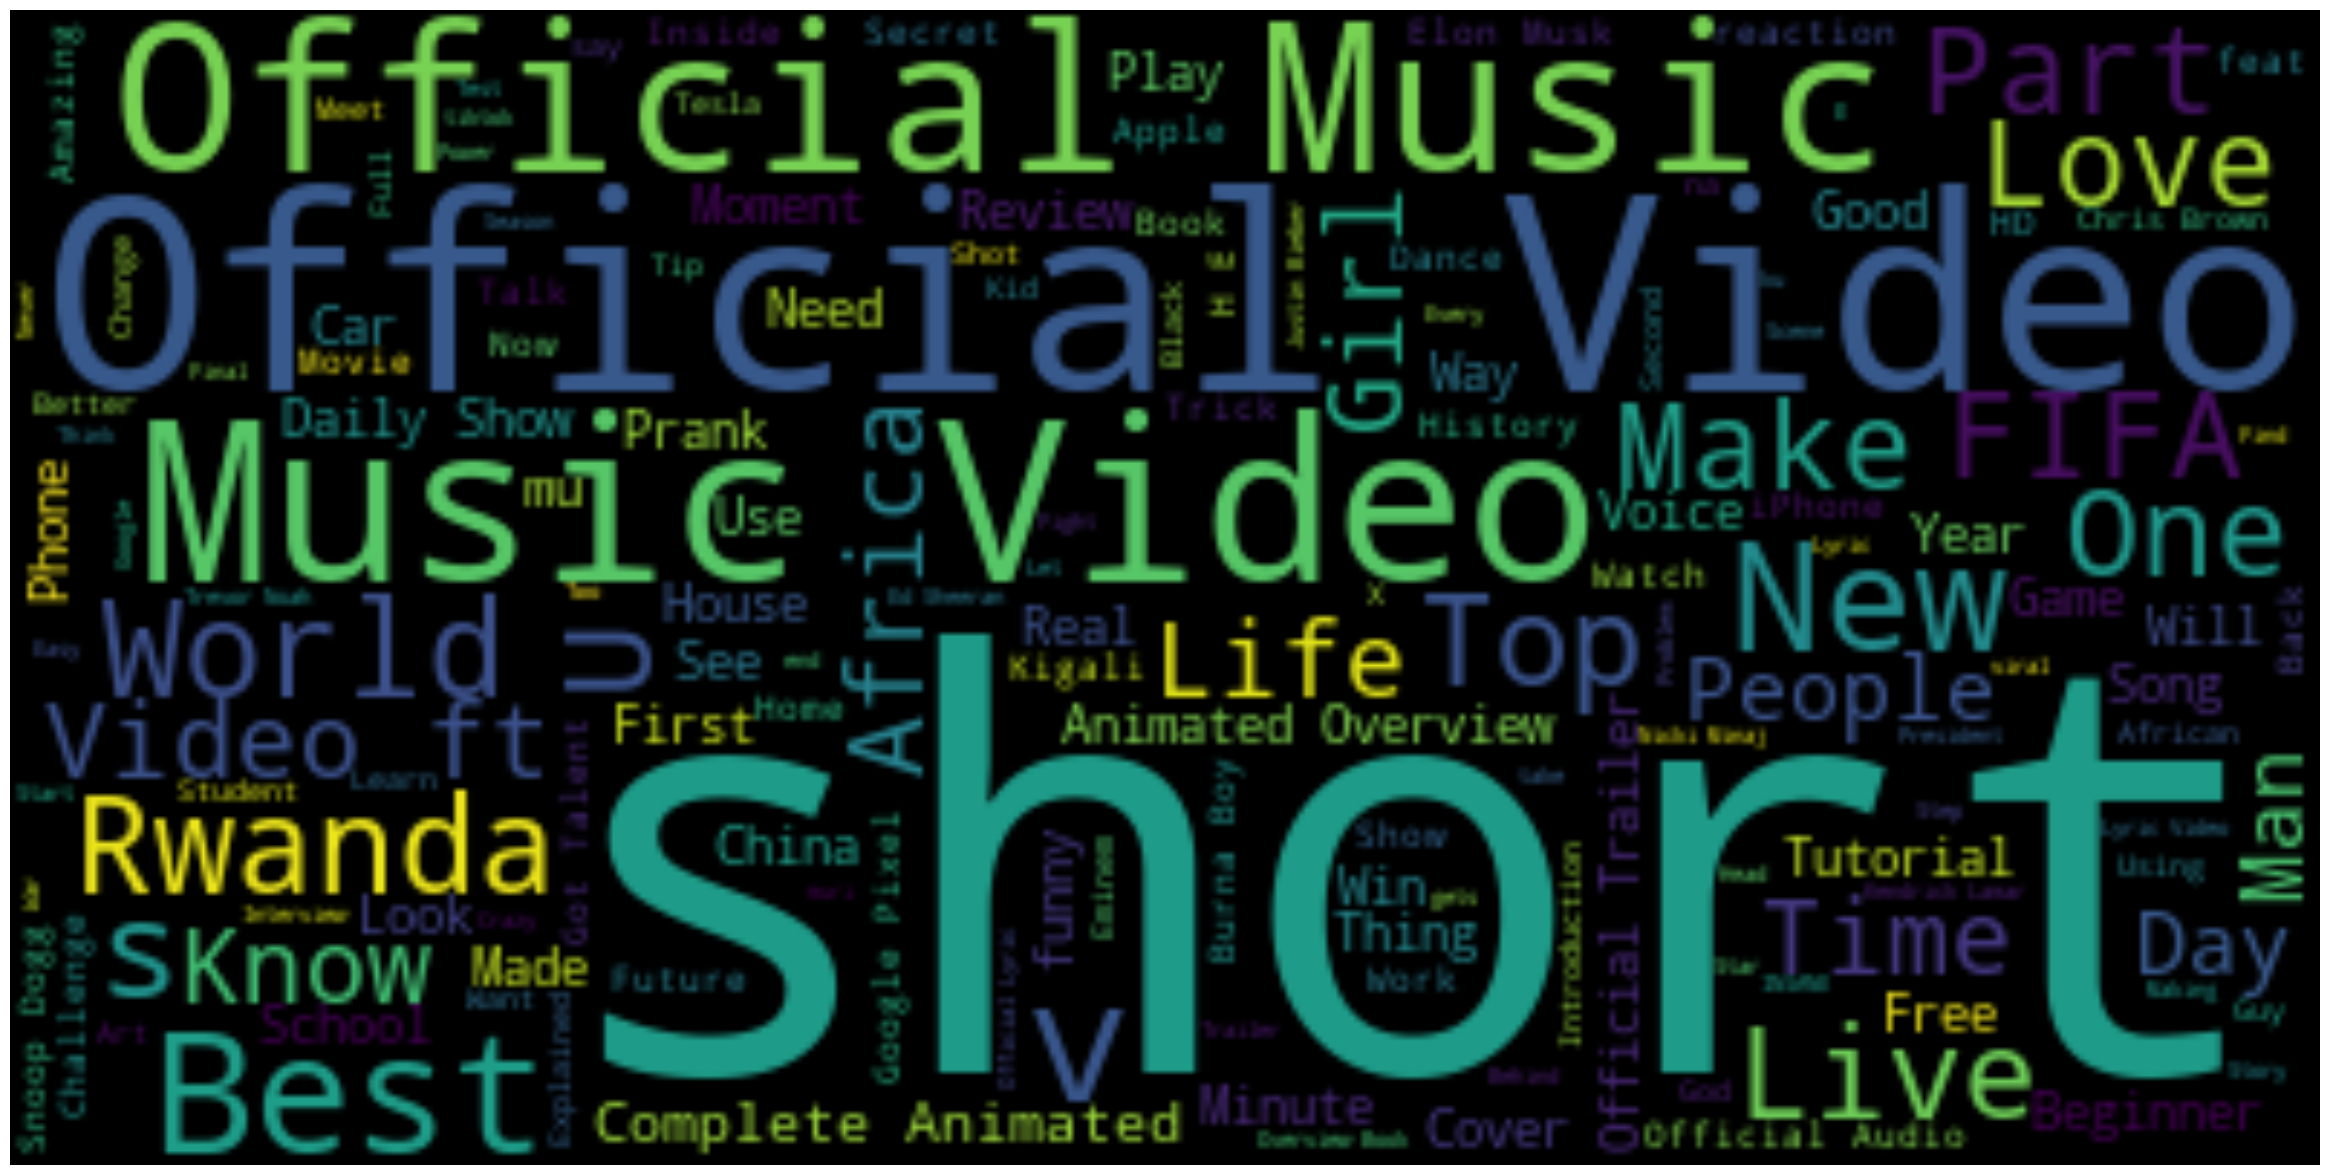

In [30]:
# Generating a word cloud from video titles watched
video_title_text = " ".join(cleaned_data["title"].tolist())
word_cloud = WordCloud(background_color="black", max_font_size=100).generate(
    video_title_text
)
plt.figure(figsize=(50, 15))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

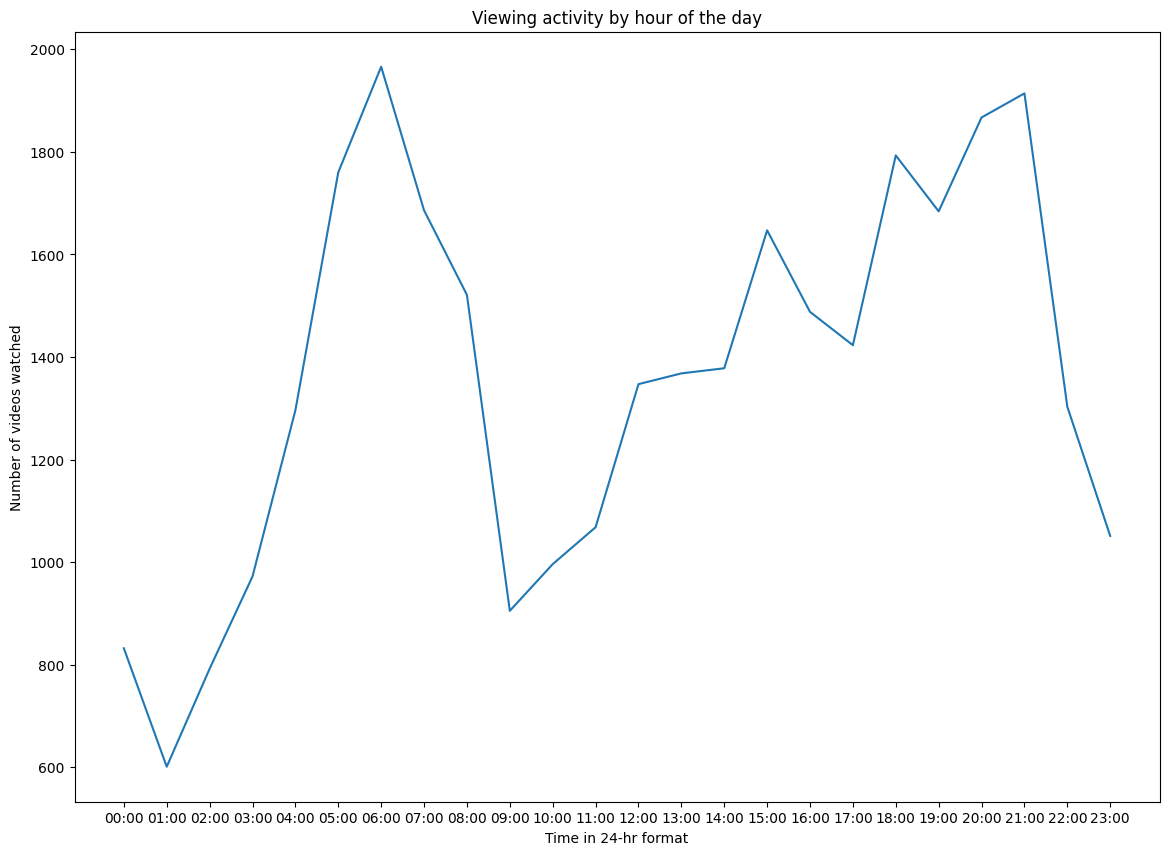

In [7]:
# Analysis of viewing activity by hour of the day
data_by_hour = cleaned_data["hour"].groupby(cleaned_data["hour"]).count()
plt.figure(figsize=(14, 10))
ax = sns.lineplot(data_by_hour)
ax.set(
    xlabel="Time in 24-hr format",
    ylabel="Number of videos watched",
    title="Viewing activity by hour of the day",
)
plt.show()

In [ ]:
# Analysis of viewing activity by month
days_of_week = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
data_by_week_day = pd.Categorical(
    cleaned_data["dayName"], categories=days_of_week, ordered=True
)
data_by_week_day = cleaned_data["dayName"].groupby(data_by_week_day).count()
plt.figure(figsize=(14, 10))
ax = sns.barplot(y=data_by_week_day, x=data_by_week_day.index)
ax.set(
    xlabel="Week Day",
    ylabel="Number of videos watched",
    title="Viewing activity by week day",
)
plt.show()

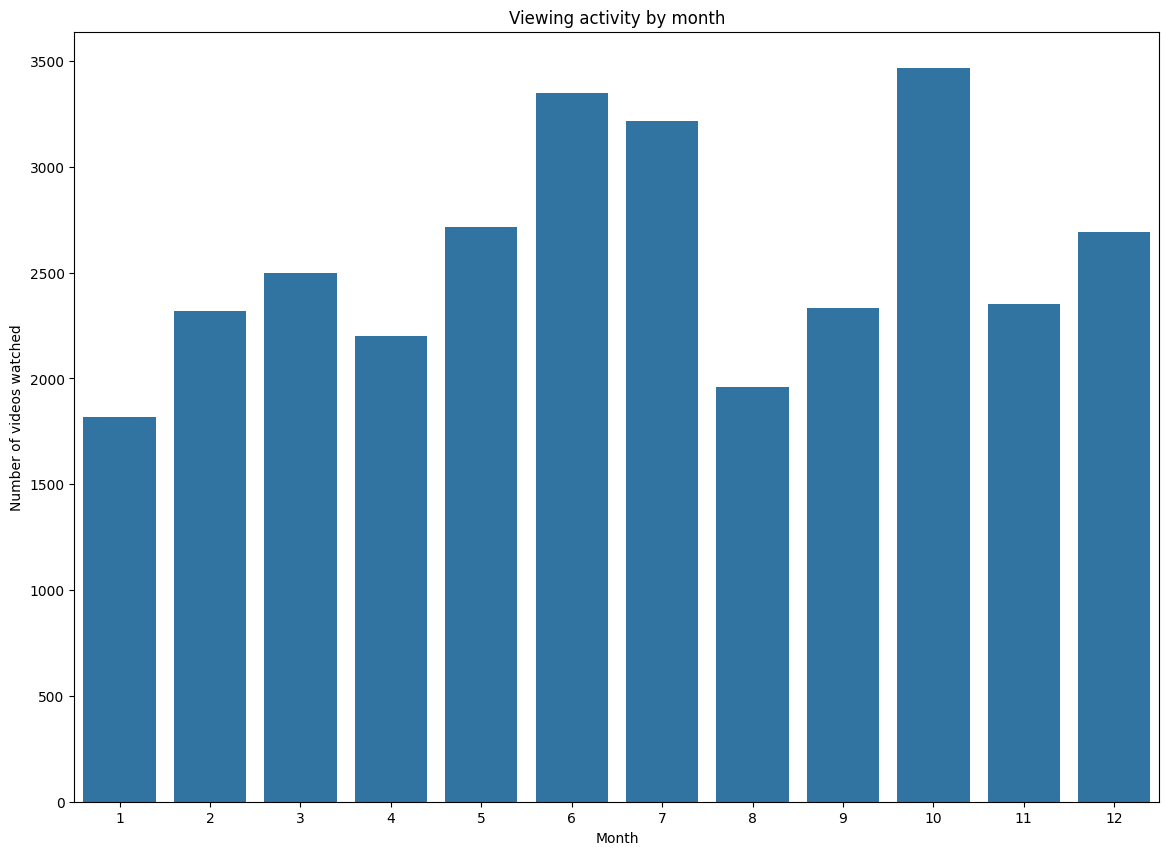

In [39]:
# Analysis of viewing activity by week day
months = range(1, 13)
data_by_month = pd.Categorical(
    cleaned_data["month"], categories=months, ordered=True
)
data_by_month = cleaned_data["month"].groupby(data_by_month).count()
plt.figure(figsize=(14, 10))
ax = sns.barplot(y=data_by_month, x=data_by_month.index)
ax.set(
    xlabel="Month",
    ylabel="Number of videos watched",
    title="Viewing activity by month",
)
plt.show()

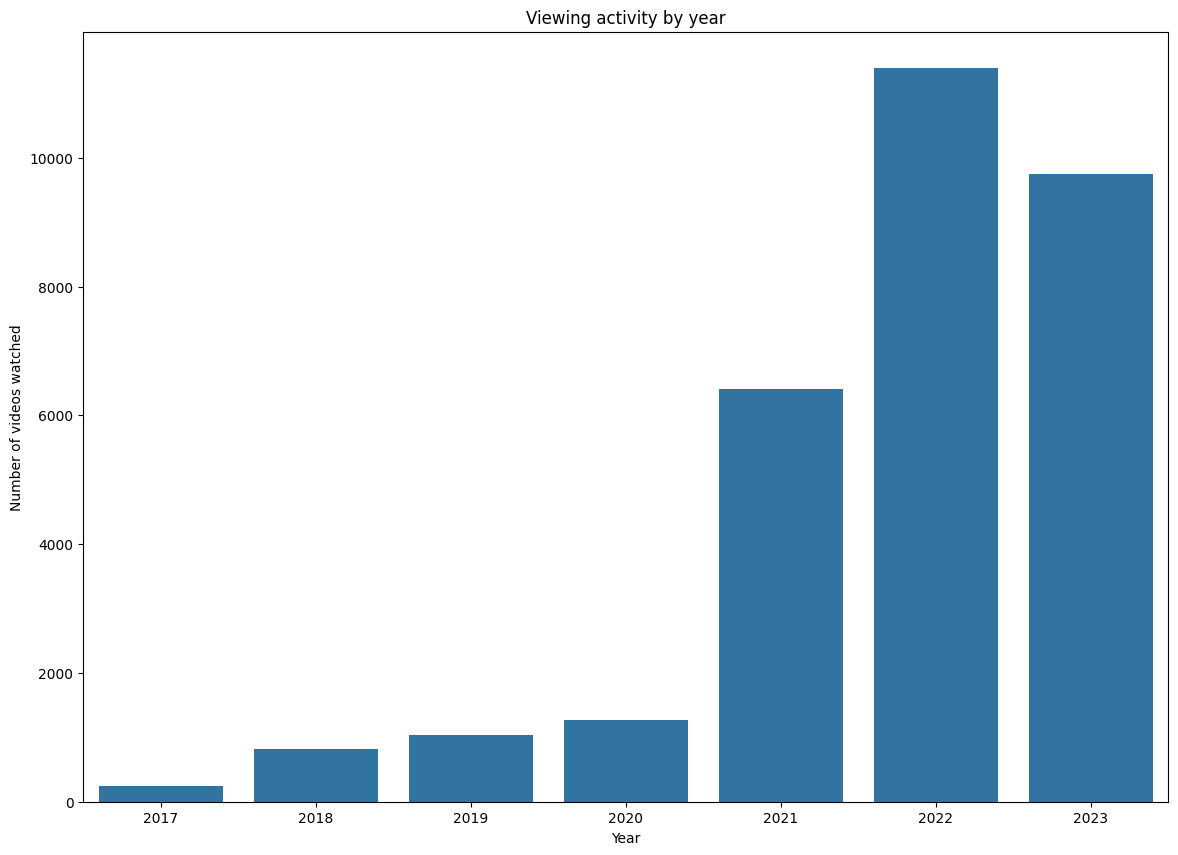

In [38]:
# Analysis of viewing activity by year
years = range(2017, 2024)
data_by_year = pd.Categorical(
    cleaned_data["year"], categories=years, ordered=True
)
data_by_year = cleaned_data["year"].groupby(data_by_year).count()
plt.figure(figsize=(14, 10))
ax = sns.barplot(y=data_by_year, x=data_by_year.index)
ax.set(
    xlabel="Year",
    ylabel="Number of videos watched",
    title="Viewing activity by year",
)
plt.show()

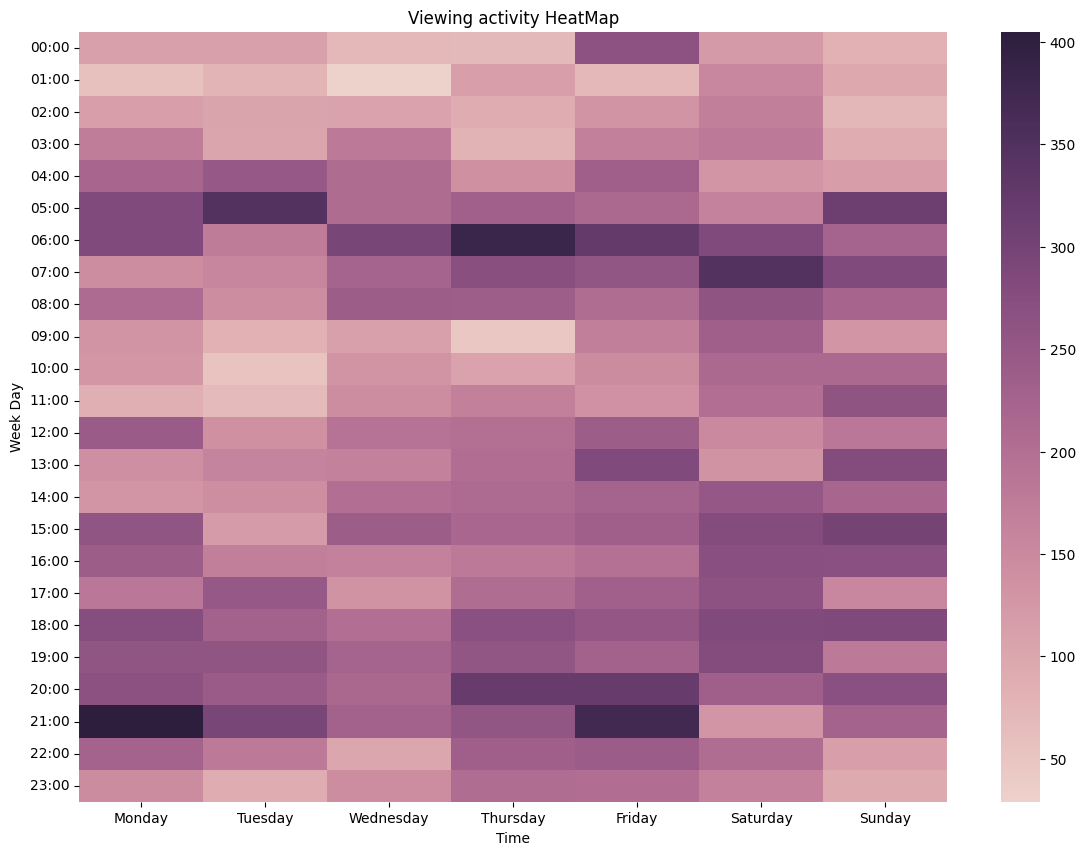

In [9]:
# Viewing Activity HeatMap
dayNames = pd.Categorical(
    cleaned_data["dayName"], categories=days_of_week, ordered=True
)
hour_dayName = cleaned_data.groupby(["hour", dayNames]).count()["title"].unstack()

plt.figure(figsize=(14, 10))
ax = sns.heatmap(hour_dayName, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set(xlabel="Time", ylabel="Week Day", title="Viewing activity HeatMap")
plt.show()